### Merge data
One dataframe that contains county-level data associated with HIV Incidence is created by merging data from:
* amfAR (The Foundation of AIDS Research)
* CAMP (Emory Coalition for Applied Modeling for Prevention)
* ACS (The American Community Survey)

This process is based on Eric Logue's [Forecasting HIV Infections](https://github.com/elogue01/Forecasting-HIV-Infections) capstone project.

In [6]:
import pandas as pd

### amfAR data

In [8]:
#load Amfar opioid and HIV data, add county code
opiod_df = pd.read_table('../data/amfAR/countydata.tsv',header=0)
opiod_df['county_code'] = opiod_df.STATEFP*1000 + opiod_df.COUNTYFP # build a county code column
opiod_df['county_code'] = opiod_df.county_code.astype(int)

In [9]:
opiod_df.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,COUNTY,STATE,STATEABBREVIATION,county_code
0,1,1,2017,bup_phys,2.0,Autauga County,Alabama,AL,1001
1,1,3,2017,bup_phys,13.0,Baldwin County,Alabama,AL,1003
2,1,5,2017,bup_phys,0.0,Barbour County,Alabama,AL,1005
3,1,7,2017,bup_phys,0.0,Bibb County,Alabama,AL,1007
4,1,9,2017,bup_phys,1.0,Blount County,Alabama,AL,1009


The INDICATOR and VALUE columns contain HIV related data.

In [10]:
#make changes to the amfar dataframe
#convert from long to wide format
index_lst = ['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR']
col_lst = ['INDICATOR']
opiod_df_wide = opiod_df.pivot_table(values='VALUE', index=index_lst, columns=col_lst).reset_index()

In [11]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,CDC_consult,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed,vulnerable_rank
0,1001,Autauga County,AL,1999,NaN,NaN,NaN,NaN,NaN,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,Autauga County,AL,2000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,Autauga County,AL,2001,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,Autauga County,AL,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,Autauga County,AL,2003,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Focus on just the HIV related data, from 2008 onward
opiod_df_wide = opiod_df_wide[opiod_df_wide['YEAR'] >= 2008] # subset for years that have hiv data
cols_to_drop = ['CDC_consult', 'vulnerable_rank']
#, 'num_SSPs', 'bup_phys', 'drugdep', 'pctunmetneed', 'nonmedpain']
opiod_df_wide.drop(cols_to_drop, axis=1, inplace=True) # drop unnecessary columns

In [13]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,NaN,NaN,0.0,...,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,NaN,NaN,0.0,...,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,8.1,NaN,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,NaN,NaN,0.0,...,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,NaN,NaN,0.0,...,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By default pandas doesn't show all the columns (shows ... instead).  Set max columns so that all can be inspected.

In [14]:
pd.get_option("display.max_columns")

20

In [15]:
pd.set_option("display.max_columns", 100)

In [16]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,bup_phys,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,54742.0,0.0,0.0,0.0,NaN,NaN,8.1,NaN,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,55255.0,0.0,0.0,0.0,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,NaN,NaN,0.0,NaN,1.0,0.0,0.0,NaN,55027.0,1.0,0.0,0.0,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Many NaNs in the data.  Fill numerical where appropriate, per Eric.

In [17]:
fill_nan_cols = ['HIVdiagnoses', 'HIVincidence', 'HIVprevalence',
                 'PLHIV', 'drugdeathrate', 'drugdeaths']
opiod_df_wide[fill_nan_cols] = opiod_df_wide[fill_nan_cols].fillna(0) #fill NaNs for suppressed data with zeroes

In [18]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,bup_phys,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,6.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,6.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,54742.0,0.0,0.0,0.0,NaN,0.0,8.1,0.0,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,55255.0,0.0,0.0,0.0,NaN,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,55027.0,1.0,0.0,0.0,NaN,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Subset data to 2015
opiod_df_15 = opiod_df_wide[opiod_df_wide['YEAR'] == 2015]

In [20]:
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,bup_phys,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
16,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,NaN,0.0,10.1,0.0,NaN,1084.0,NaN,NaN,2.34,10.1,NaN
35,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,NaN,21.1,20.1,43.0,NaN,1148.5,NaN,NaN,2.56,13.0,NaN
54,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,NaN,0.0,6.1,0.0,NaN,577.6,NaN,NaN,1.46,15.5,NaN
73,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,NaN,0.0,14.1,0.0,NaN,563.0,NaN,NaN,0.39,9.7,NaN
92,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,NaN,0.0,16.1,11.0,NaN,459.0,NaN,NaN,1.22,11.6,NaN


In [21]:
pd.options.mode.chained_assignment = None  # default='warn', get rid of annoying warning associated with dropping below
# drop columns having no 2015 data, will be extraploated from following years later
opiod_df_15.drop(['num_SSPs', 'bup_phys', 'drugdep', 'pctunmetneed', 'nonmedpain'], axis=1, inplace=True)

In [22]:
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins
16,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1
35,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0
54,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5
73,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7
92,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6


In [23]:
# get esimates for num_SSPs, bug_phys, drug_dep, pctunmetneed, and nonmedpain from following years

#subset opioid related data from one year only
#number of needle exchange programs (num_SSPs)
opiod_df_wide_17 = opiod_df_wide[opiod_df_wide['YEAR'] == 2017]
df_num_SSP = opiod_df_wide_17[['num_SSPs', 'county_code']]

#number of doctors licensed to rx Buprenorphine (bup_phys)
df_bup_phys = opiod_df_wide_17[['bup_phys', 'county_code']]

#percent with drug dependency (drug_dep)
opiod_df_wide_16 = opiod_df_wide[opiod_df_wide['YEAR'] == 2016]
df_drugdep = opiod_df_wide_16[['drugdep', 'county_code']]

#percent unmet drug treatment need (pctunmetneed)
df_pctunmetneed = opiod_df_wide_16[['pctunmetneed', 'county_code']]

#percent taken pain meds for nonmedical use (nonmedpain)
df_nonmedpain = opiod_df_wide_16[['nonmedpain', 'county_code']]

In [24]:
# merge these values back into 2015 dataframe
#merge opioid related data back to the 2015 dataframe
opiod_df_15 = opiod_df_15.merge(df_num_SSP, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_bup_phys, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_drugdep, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_pctunmetneed, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_nonmedpain, on='county_code')

In [25]:
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62


### CAMP data

In [26]:
#load Men who have sex with men (MSM) estimate data
msm_df = pd.read_csv("../data/CAMP/US_MSM_Estimates_Data_2013.csv")    #load the data
msm_df['county_code'] = msm_df.STATEFP*1000 + msm_df.COUNTYFP  # build a county code column
msm_df['county_code'] = msm_df.county_code.astype(int)
msm_df['%msm12month'] = 100 * (msm_df.MSM12MTH / msm_df.ADULTMEN) # build a %MSM within last 12 months column
msm_df['%msm5yr'] = 100 * (msm_df.MSM5YEAR / msm_df.ADULTMEN)     # build a %MSM within last 5years column

In [27]:
msm_df.head()

,REGCODE,DIVCODE,STATEFP,COUNTYFP,CSACODE,CBSACODE,METDCODE,METMICSA,CENTOUTL,ADULTMEN,MSM12MTH,MSM5YEAR,county_code,%msm12month,%msm5yr
0,3,6,1,1,NaN,33860.0,NaN,1.0,NaN,19410,333,514,1001,1.715611,2.648120
1,3,6,1,3,380.0,19300.0,NaN,1.0,1.0,69724,925,1429,1003,1.326659,2.049509
2,3,6,1,5,NaN,NaN,NaN,NaN,NaN,11567,82,127,1005,0.708913,1.097951
3,3,6,1,7,142.0,13820.0,NaN,1.0,2.0,9508,119,184,1007,1.251578,1.935212
4,3,6,1,9,142.0,13820.0,NaN,1.0,2.0,21368,601,928,1009,2.812617,4.342943


In [28]:
cols_to_drop = ['REGCODE', 'DIVCODE', 'STATEFP', 'COUNTYFP', 'CSACODE', 
                'CBSACODE','METDCODE', 'METMICSA', 'CENTOUTL']
msm_df.drop(cols_to_drop, axis=1, inplace=True) #drop all unneeded columns
msm_df.head()

,ADULTMEN,MSM12MTH,MSM5YEAR,county_code,%msm12month,%msm5yr
0,19410,333,514,1001,1.715611,2.648120
1,69724,925,1429,1003,1.326659,2.049509
2,11567,82,127,1005,0.708913,1.097951
3,9508,119,184,1007,1.251578,1.935212
4,21368,601,928,1009,2.812617,4.342943


### ACS data

In [32]:
#unemplyment data
df_employment = pd.read_csv("../data/ACS_14_5YR_employment/ACS_14_5YR_S2301_with_ann.csv", 
                            encoding = "ISO-8859-1", skiprows=1)
df_employment = df_employment[['Id2', 'Unemployment rate; Estimate; Population 16 years and over']]
df_employment.columns = ['county_code', 'unemployment_rate']
df_employment.head()

,county_code,unemployment_rate
0,1001,8.5
1,1003,8.6
2,1005,14.2
3,1007,10.9
4,1009,9.3


In [33]:
#poverty data
df_poverty = pd.read_csv("../data/ACS_14_5YR_poverty/ACS_14_5YR_S1701_with_ann.csv", 
                         encoding = "ISO-8859-1", skiprows=1)
df_poverty = df_poverty[['Id2', 'Percent below poverty level; Estimate; Population for whom poverty status is determined']]
df_poverty.columns = ['county_code', 'poverty_rate']
df_poverty.head()

/Users/ilya/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,14,19,20,193,194,265,266) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,county_code,poverty_rate
0,1001,12.8
1,1003,13.8
2,1005,24.1
3,1007,17.0
4,1009,17.3


In [35]:
#income data
df_income = pd.read_csv("../data/ACS_14_5YR_income/ACS_14_5YR_S1901_with_ann.csv", 
                        encoding = "ISO-8859-1", skiprows=1)
df_income = df_income[['Id2', 'Households; Estimate; Total']]
df_income.columns = ['county_code', 'household_income']
df_income.head()

,county_code,household_income
0,1001,20304
1,1003,73058
2,1005,9145
3,1007,7078
4,1009,20934


**Note:** Insurance data is also included in `data/ACS_14_5Y_health_insur_coverage` but 
reading and cleaning the data is left to the user, if desired.

### Merging all the dataframes together into one dataframe

In [36]:
#merge asfAR hiv/opioid data with CAMP MSM data
df_main = opiod_df_15.merge(msm_df, on='county_code')

#merge in ACS data
df_main = df_main.merge(df_employment, on='county_code')
df_main = df_main.merge(df_poverty, on='county_code')
df_main = df_main.merge(df_income, on='county_code')

In [37]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_code        3140 non-null   int64  
 1   COUNTY             3140 non-null   object 
 2   STATEABBREVIATION  3140 non-null   object 
 3   YEAR               3140 non-null   int64  
 4   AMAT_fac           3140 non-null   float64
 5   HIVdiagnoses       3140 non-null   float64
 6   HIVincidence       3140 non-null   float64
 7   HIVprevalence      3140 non-null   float64
 8   MH_fac             3140 non-null   float64
 9   Med_AMAT_fac       3140 non-null   float64
 10  Med_MH_fac         3140 non-null   float64
 11  Med_SA_fac         3140 non-null   float64
 12  Med_SMAT_fac       3140 non-null   float64
 13  Med_TMAT_fac       3140 non-null   float64
 14  PLHIV              3140 non-null   float64
 15  Population         3140 non-null   float64
 16  SA_fac             3140 

In [38]:
df_main.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [39]:
df_main.to_csv('../data/merged_data.csv')

In [41]:
df_main.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')

In [42]:
len(df_main)

3140

array([[<AxesSubplot:xlabel='county_code', ylabel='county_code'>,
        <AxesSubplot:xlabel='YEAR', ylabel='county_code'>,
        <AxesSubplot:xlabel='AMAT_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='HIVdiagnoses', ylabel='county_code'>,
        <AxesSubplot:xlabel='HIVincidence', ylabel='county_code'>,
        <AxesSubplot:xlabel='HIVprevalence', ylabel='county_code'>,
        <AxesSubplot:xlabel='MH_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='Med_AMAT_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='Med_MH_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='Med_SA_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='Med_SMAT_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='Med_TMAT_fac', ylabel='county_code'>,
        <AxesSubplot:xlabel='PLHIV', ylabel='county_code'>,
        <AxesSubplot:xlabel='Population', ylabel='county_code'>],
       [<AxesSubplot:xlabel='county_code', ylabel='YEAR'>,
        <AxesSubplot:xlabel='YEAR

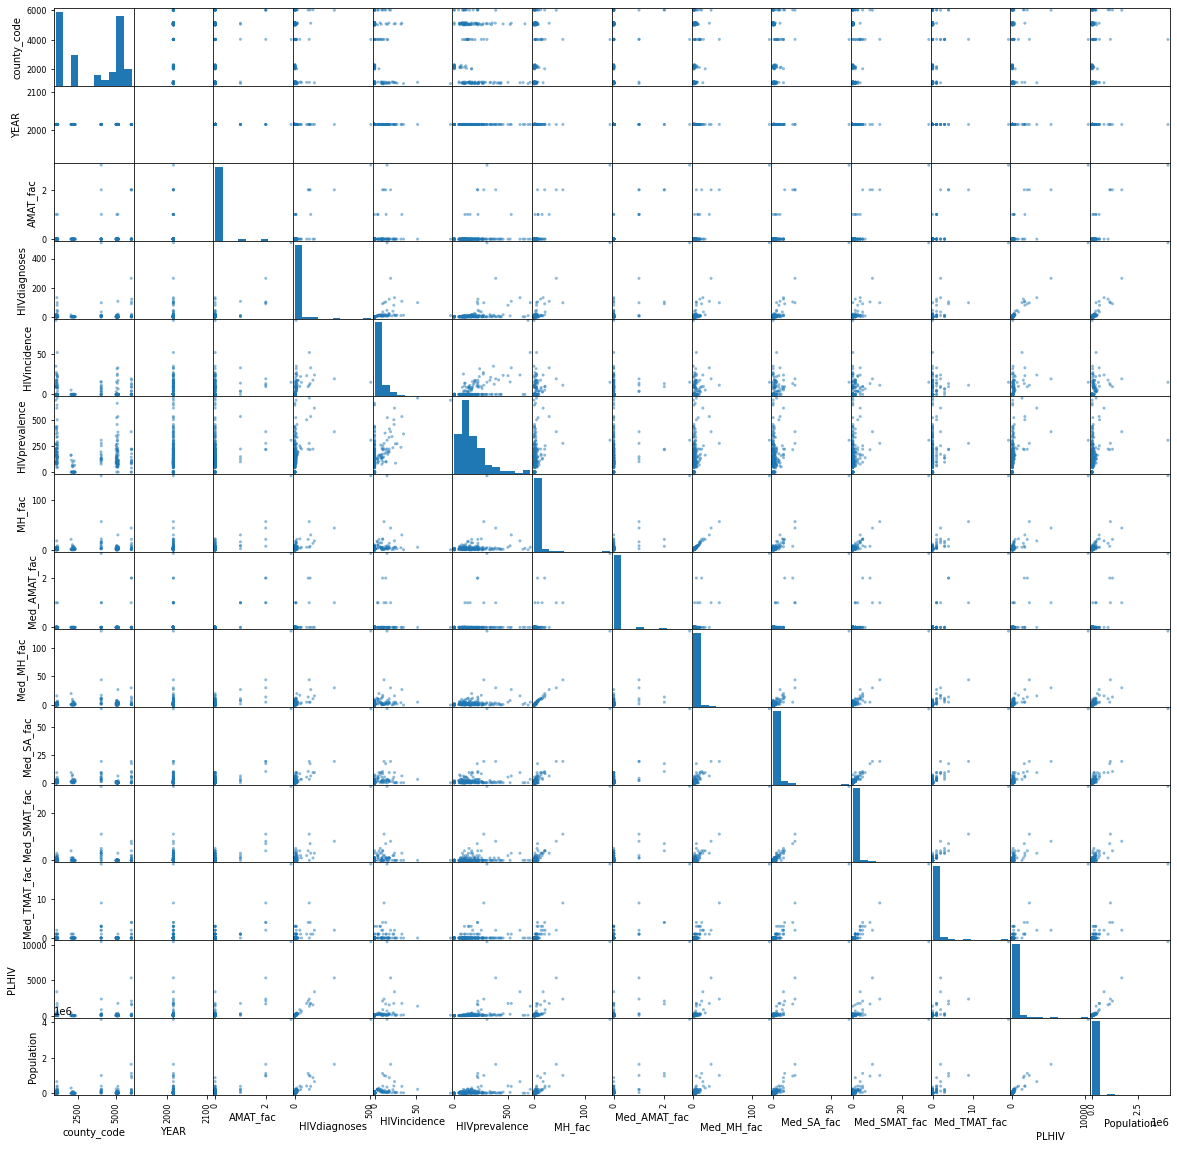

In [44]:
pd.plotting.scatter_matrix(df_main.iloc[:200,:16] , figsize = (20,20));

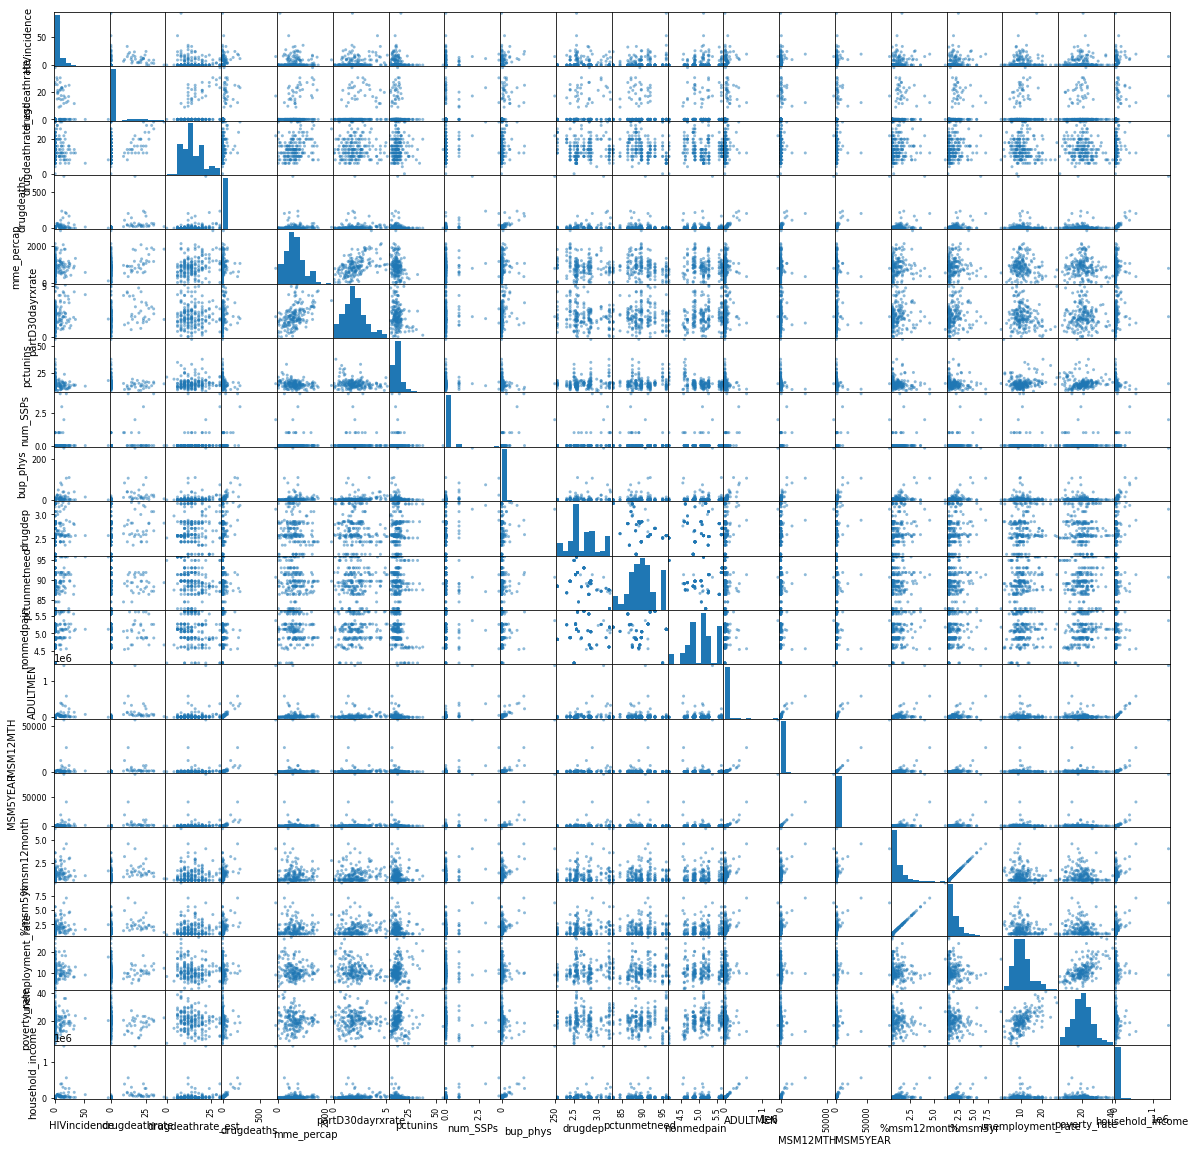

In [46]:
col_lst = ['HIVincidence', 'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income']
pd.plotting.scatter_matrix(df_main.loc[:200,col_lst] , figsize = (20,20));

In [45]:
df_main.iloc[:5,:16]

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0


HIVincidences - HIVprevelance (linear correlation)/100000, %MSM12, drugdep, unemployment_rate, household_income

In [50]:
simple_df = df_main[['HIVincidence', 'HIVprevalence', '%msm12month', 'drugdep', 'unemployment_rate', 'household_income']]
simple_df.to_csv('../data/eda_init.csv')

In [62]:
simple_df[simple_df['drugdep'].isna()]

,HIVincidence,HIVprevalence,%msm12month,drugdep,unemployment_rate,household_income


In [61]:
simple_df = simple_df.drop(index = 547, axis = 1)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as scs
import sklearn.metrics as metrics

data = simple_df.drop(columns ='HIVincidence')
target = simple_df['HIVincidence']

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.25)

kf = KFold(n_splits = 5)

mean_squared = []

for train, test in kf.split(X_train):
    x_train = data.iloc[train]
    y_train = target.iloc[train]
    x_test = data.iloc[test]
    y_test = target.iloc[test]
    
    X_scaler = StandardScaler()
#     y_scaler = StandardScaler()
    
    X_scaler.fit(x_train)
#     y_scaler.fit(y_train)
    
    x_train = X_scaler.transform(x_train)
    x_test = X_scaler.transform(x_test)
#     y_scaler.transform(y_train)
#     y_scaler.transform(y_test)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    
    y_hat = lin_reg.predict(x_test)
    mean_squared.append(metrics.mean_squared_error(y_test, y_hat))

In [77]:
mean_squared

[96.48422323804411,
 1217.3297194942986,
 44.265433967633975,
 43.79908260351841,
 31.78554745290072]

In [87]:
X_test = X_scaler.transform(X_test)
dummy = lin_reg.predict(X_test)

In [88]:
metrics.mean_squared_error(Y_test, dummy)**.5

27.467953272939845

In [91]:
lin_reg.coef_

array([ 7.01738838,  1.3761661 , -0.53687905,  0.21633748,  0.41819537])

In [96]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

def plot_model(X, y, label='Residual Plot'):
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()

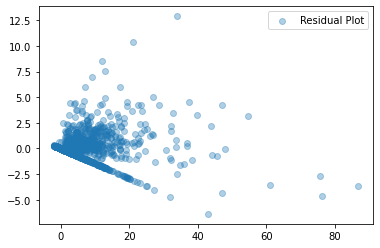

In [99]:
summary_model(X_train, Y_train)
plot_model(X_train, Y_train)

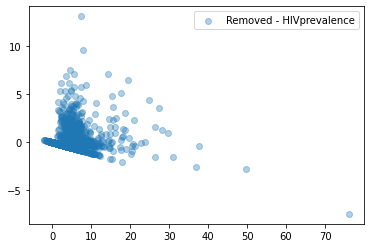

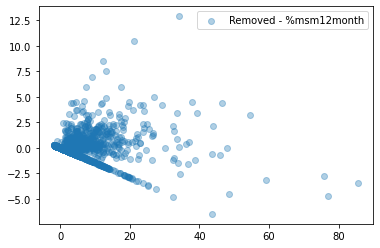

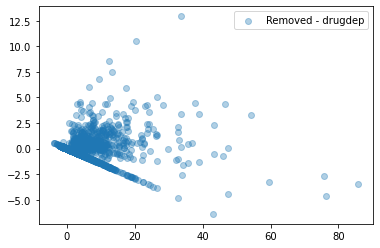

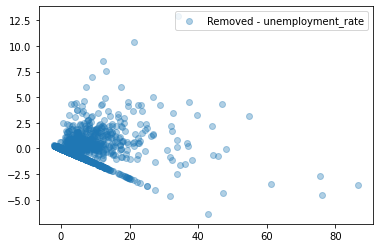

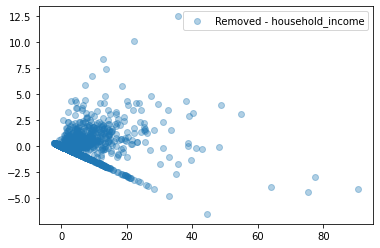

In [100]:
all_columns = X_train.columns
for col_name in all_columns:
    all_columns_copy = list(all_columns)
    all_columns_copy.remove(col_name)
    plot_model(X_train[all_columns_copy], Y_train, 'Removed - ' + str(col_name))